# COFFEE CHAIN SALES - CLUSTER 

In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [73]:
df = pd.read_csv("Coffee_Chain_Sales.csv")
df.head(10)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
5,712,0,-29,10/5/2012,430,43,Small Market,Central,0,Beans,...,Decaf Espresso,31,43,Iowa,0,60,60,60,12,Decaf
6,860,47,-29,10/6/2012,375,64,Small Market,East,15,Beans,...,Decaf Espresso,21,111,Connecticut,30,60,50,90,43,Decaf
7,918,27,-39,10/7/2012,859,39,Small Market,South,7,Beans,...,Decaf Irish Cream,21,66,Oklahoma,30,60,60,90,18,Decaf
8,775,31,-43,10/8/2012,1000,37,Small Market,West,9,Beans,...,Decaf Irish Cream,7,68,Nevada,30,60,50,90,30,Decaf
9,435,40,-23,10/9/2012,881,59,Small Market,West,11,Beans,...,Decaf Espresso,37,99,Utah,20,60,60,80,22,Decaf


In [74]:
df_Central= df[df['Market'] == 'Central']
df_Central.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
5,712,0,-29,10/5/2012,430,43,Small Market,Central,0,Beans,...,Decaf Espresso,31,43,Iowa,0,60,60,60,12,Decaf
16,573,45,-36,10/16/2012,320,64,Small Market,Central,41,Leaves,...,Chamomile,-6,109,Missouri,20,60,30,80,70,Decaf
17,262,48,-15,10/17/2012,851,70,Small Market,Central,13,Leaves,...,Lemon,45,118,Wisconsin,30,60,60,90,25,Decaf


In [75]:
df_Central.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 885
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area Code                               336 non-null    int64 
 1   Cogs                                    336 non-null    int64 
 2   DifferenceBetweenActualandTargetProfit  336 non-null    int64 
 3   Date                                    336 non-null    object
 4   Inventory Margin                        336 non-null    int64 
 5   Margin                                  336 non-null    int64 
 6   Market_size                             336 non-null    object
 7   Market                                  336 non-null    object
 8   Marketing                               336 non-null    int64 
 9   Product_line                            336 non-null    object
 10  Product_type                            336 non-null    object
 11  Product    

In [76]:
df_Central['Product_type'] = df_Central['Product_type'].replace(['Herbal Tea'], '1')
df_Central['Product_type'] = df_Central['Product_type'].replace(['Tea'], '2')
df_Central['Product_type'] = df_Central['Product_type'].replace(['Espresso'], '3')
df_Central['Product_type'] = df_Central['Product_type'].replace(['Coffee'], '4')


/var/folders/rv/tzvkt9m90g114wnl429753740000gn/T/ipykernel_2221/3952065056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Central['Product_type'] = df_Central['Product_type'].replace(['Herbal Tea'], '1')
/var/folders/rv/tzvkt9m90g114wnl429753740000gn/T/ipykernel_2221/3952065056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Central['Product_type'] = df_Central['Product_type'].replace(['Tea'], '2')
/var/folders/rv/tzvkt9m90g114wnl429753740000gn/T/ipykernel_2221/3952065056.py:3: SettingWithCop

In [77]:
df_Central.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
5,712,0,-29,10/5/2012,430,43,Small Market,Central,0,Beans,...,Decaf Espresso,31,43,Iowa,0,60,60,60,12,Decaf
16,573,45,-36,10/16/2012,320,64,Small Market,Central,41,Leaves,...,Chamomile,-6,109,Missouri,20,60,30,80,70,Decaf
17,262,48,-15,10/17/2012,851,70,Small Market,Central,13,Leaves,...,Lemon,45,118,Wisconsin,30,60,60,90,25,Decaf


In [78]:
df_Central = df_Central.iloc[:, [10,15,16,17,19]]
df_Central.head(4)

,Product_type,Target_cogs,Target_margin,Target_profit,Total_expenses
0,1,30,60,30,76
1,1,30,60,50,45
5,3,0,60,60,12
16,1,20,60,30,70


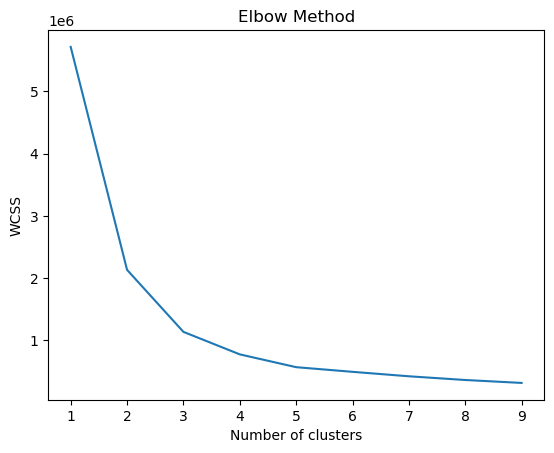

In [79]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_Central)
    wcss.append(kmeans.inertia_)  

# Plot the elbow method graph
plt.plot(range(1, 10), wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_Central)

# Add the cluster labels to the DataFrame
df_Central['Cluster'] = clusters

# Create separate dataframes for each cluster
cluster_dataframes = [df_Central[df_Central['Cluster'] == i] for i in range(4)] 

In [88]:
df_Central.tail()

,Product_type,Target_cogs,Target_margin,Target_profit,Total_expenses,Cluster
881,1,230,300,200,113,1
882,1,120,170,120,62,2
883,2,210,200,120,95,1
884,2,240,300,170,144,1
885,2,10,20,-10,41,0


In [89]:
cluster_dataframes

[    Product_type  Target_cogs  Target_margin  Target_profit  Total_expenses  \
 0              1           30             60             30              76   
 1              1           30             60             50              45   
 5              3            0             60             60              12   
 16             1           20             60             30              70   
 17             1           30             60             60              25   
 ..           ...          ...            ...            ...             ...   
 874            2           60             90             60              38   
 875            4            0             20             10              15   
 877            4           60             90             40              59   
 879            3           60             90             70              25   
 885            2           10             20            -10              41   
 
      Cluster  
 0          0  
 1    

In [90]:
df_Central.info()
df_Central.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 885
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_type    336 non-null    object
 1   Target_cogs     336 non-null    int64 
 2   Target_margin   336 non-null    int64 
 3   Target_profit   336 non-null    int64 
 4   Total_expenses  336 non-null    int64 
 5   Cluster         336 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 17.1+ KB


,Target_cogs,Target_margin,Target_profit,Total_expenses,Cluster
count,336.000000,336.000000,336.000000,336.000000,336.000000
mean,74.821429,105.416667,70.119048,50.964286,0.660714
std,70.790616,83.038234,66.052788,28.064934,0.945250
min,0.000000,10.000000,-10.000000,11.000000,0.000000
25%,30.000000,50.000000,30.000000,30.000000,0.000000
50%,50.000000,80.000000,50.000000,45.500000,0.000000
75%,90.000000,140.000000,92.500000,63.000000,2.000000
max,370.000000,520.000000,420.000000,144.000000,3.000000


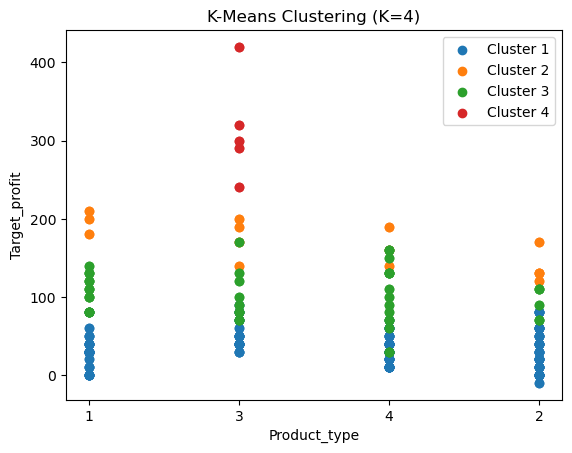

In [93]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Product_type'], cluster_df['Target_profit'], label=f'Cluster {i + 1}')

plt.xlabel('Product_type')
plt.ylabel('Target_profit')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

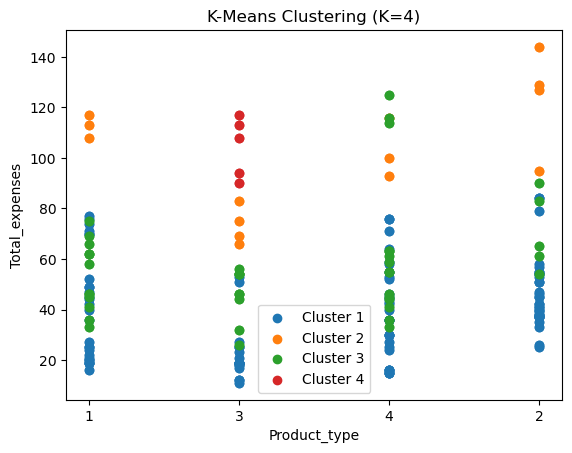

In [94]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Product_type'], cluster_df['Total_expenses'], label=f'Cluster {i + 1}')

plt.xlabel('Product_type')
plt.ylabel('Total_expenses')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

In [ ]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Product_type'], cluster_df['Total_expenses'], label=f'Cluster {i + 1}')

plt.xlabel('Product_type')
plt.ylabel('Total_expenses')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

In [95]:
import pandas as pd
#data processing

In [96]:
import pandas as pd
import numpy as np

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [98]:
df_Central.head(4)

,Product_type,Target_cogs,Target_margin,Target_profit,Total_expenses,Cluster
0,1,30,60,30,76,0
1,1,30,60,50,45,0
5,3,0,60,60,12,0
16,1,20,60,30,70,0


<Axes: xlabel='Product_type', ylabel='Target_profit'>

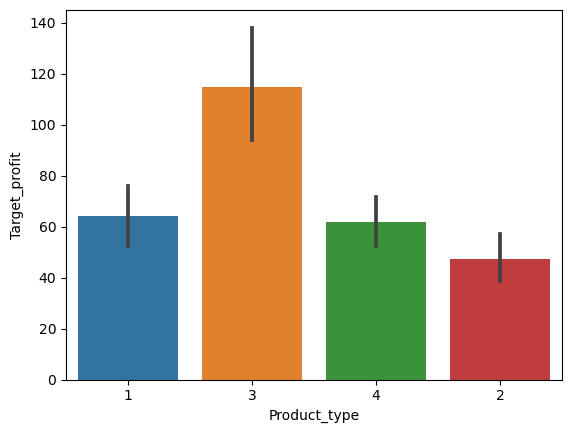

In [101]:
sns.barplot(x= 'Product_type', y= 'Target_profit', data = df_Central)

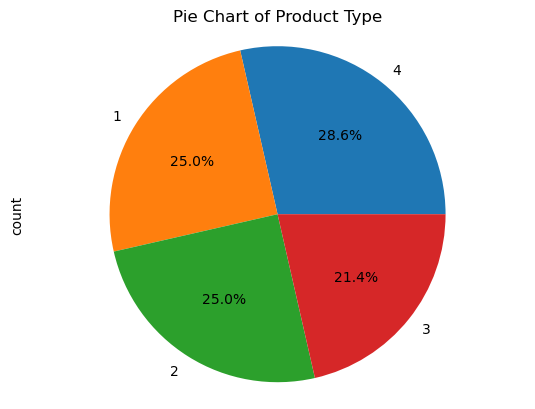

In [104]:
df_Central.Product_type.value_counts().plot.pie(autopct='%1.1f%%',
                                                 title = "Pie Chart of Product Type")

plt.axis('equal')
plt.show()

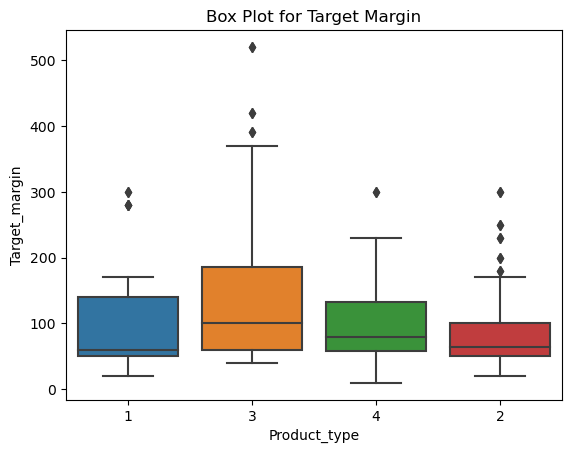

In [105]:
sns.boxplot(x = 'Product_type', y = 'Target_margin', data = df_Central)

plt.title ('Box Plot for Target Margin')
plt.show()